# Plotly demo

This notebook demonstrates plotly and cufflinks (library that's built on top of plotly and simplies plotting)

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import cufflinks as cf
import pandas_datareader.data as web

from shared.environment import Secrets

/Users/nbvasu/Code/git/notebooks/.venv/notebooks/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
df=pd.DataFrame(np.random.randn(100,5),index=pd.date_range('1/1/15',periods=100),
                columns=['IBM','MSFT','GOOG','VERZ','APPL'])
df=df.cumsum()
df.head()

,IBM,MSFT,GOOG,VERZ,APPL
2015-01-01,-1.001505,0.309360,-0.206470,0.465908,-0.996327
2015-01-02,-0.999240,1.706334,-0.027726,1.661913,-0.790778
2015-01-03,-0.271503,2.831048,0.688784,0.884759,-2.313914
2015-01-04,0.467694,2.880200,1.029427,1.587225,-3.211754
2015-01-05,-0.040762,3.610960,0.947302,0.672711,-1.844787


## Returns

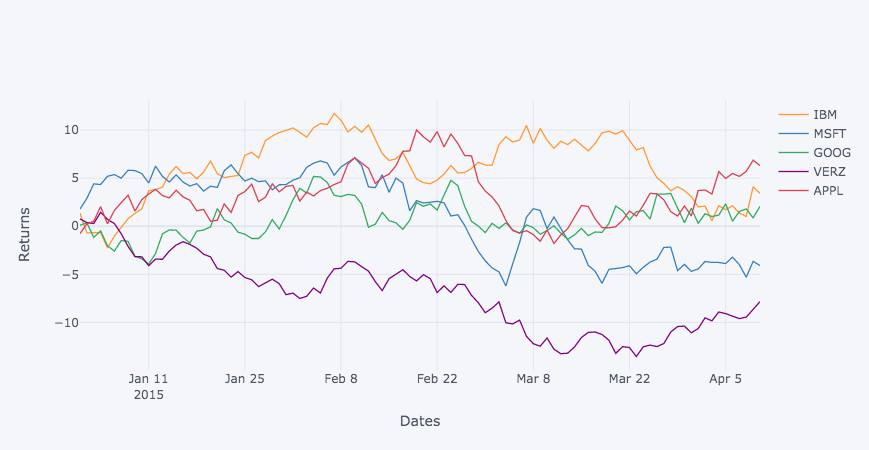

In [30]:
df.iplot(asFigure=True, xTitle='Dates', yTitle='Returns')

## Best Fit

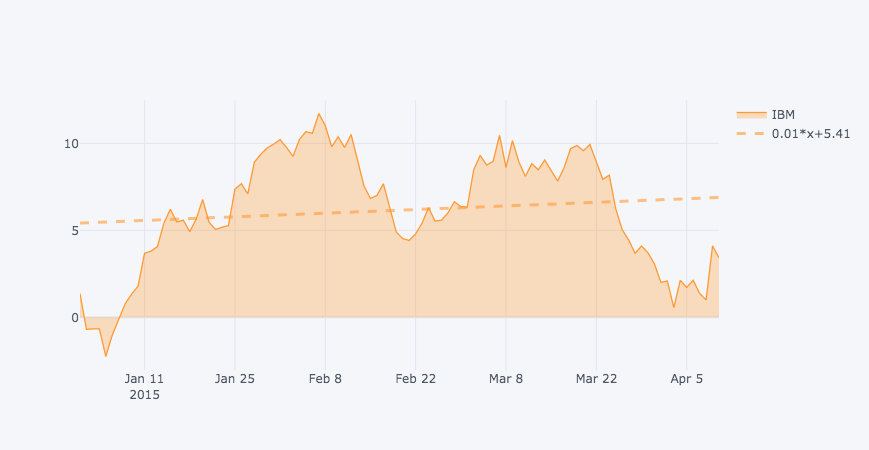

In [33]:
df['IBM'].iplot(asFigure=True, bestfit=True, fill=True)

## Spread

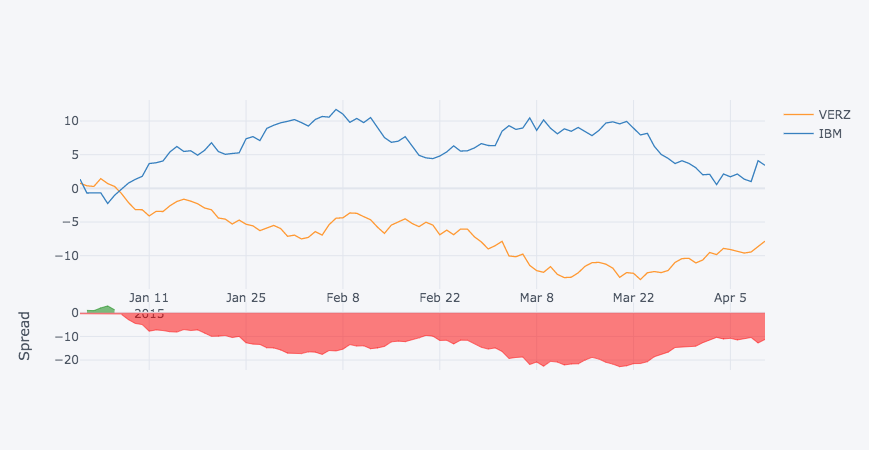

In [35]:
df[['VERZ','IBM']].iplot(asFigure=True, kind='spread')

## Histogram

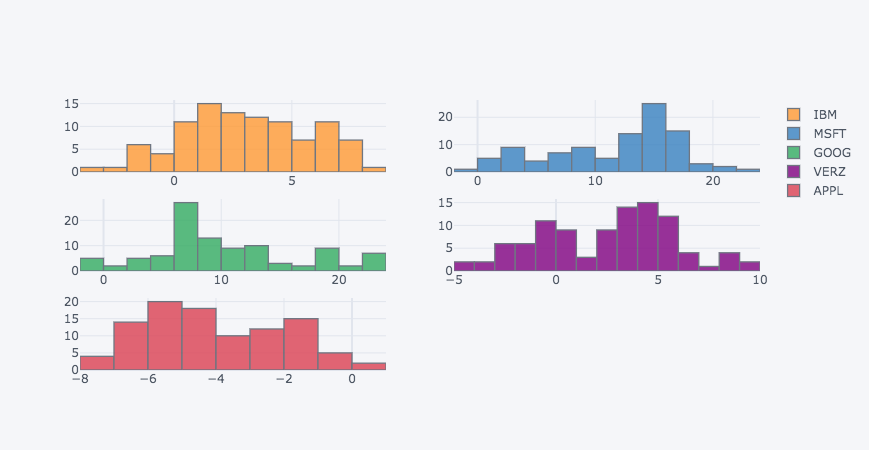

In [44]:
df.iplot(kind='hist', asFigure=True, subplots=True, bins=15)

## Financial Plots

Downloading historical data for AAPL from IEX Cloud

In [5]:
symbol = 'AAPL'
df = web.DataReader(symbol, 'iex', '2018-01-01', '2020-03-31', api_key=Secrets.get('IEX_API_KEY'))

In [6]:
df.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,170.16,172.30,169.26,172.26,25555934
2018-01-03,172.53,174.55,171.96,172.23,29517899
2018-01-04,172.54,173.47,172.08,173.03,22434597
2018-01-05,173.44,175.37,173.05,175.00,23660018
2018-01-08,174.35,175.61,173.93,174.35,20567766


OHLC plot + 10 and 20 day SMA + 20 day RSI + 20 day Bollinger bands + Volume + MACD

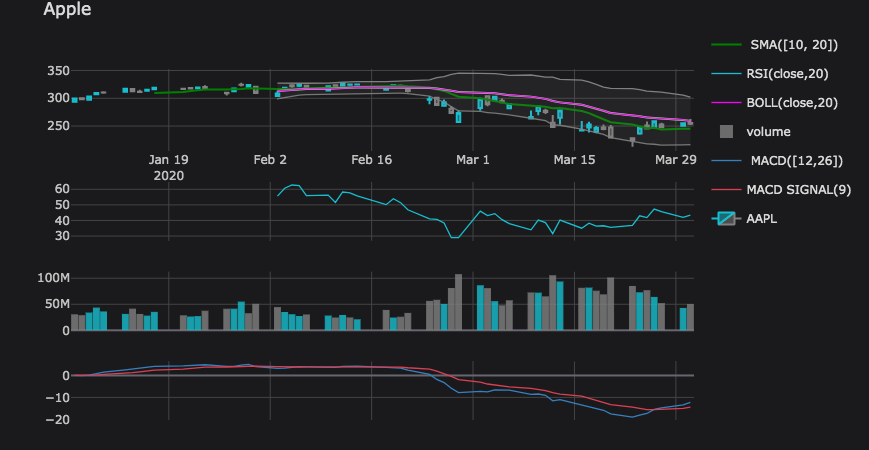

In [7]:
qf = cf.QuantFig(df.iloc[-60:], title='Apple', name='AAPL')
qf.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_rsi(periods=20,color='java', showbands=False)
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_volume()
qf.add_macd()
qf.iplot(asFigure=True)